Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   projekt_id              5 non-null      int64  
 1   type                    5 non-null      object 
 2   areal_m2                5 non-null      int64  
 3   højde_m                 5 non-null      float64
 4   materiale               5 non-null      object 
 5   kompleksitet            5 non-null      object 
 6   arbejdstimer            5 non-null      int64  
 7   materiale_omkostninger  5 non-null      int64  
 8   total_pris              5 non-null      int64  
 9   afsluttet_dato          5 non-null      object 
dtypes: float64(1), int64(5), object(4)
memory usage: 532.0+ bytes
None

Basic Statistics:
        projekt_id    areal_m2   højde_m  arbejdstimer  \
count     5.000000    5.000000  5.000000      5.000000   
mean   2003.000000  275.000000  2.840000  

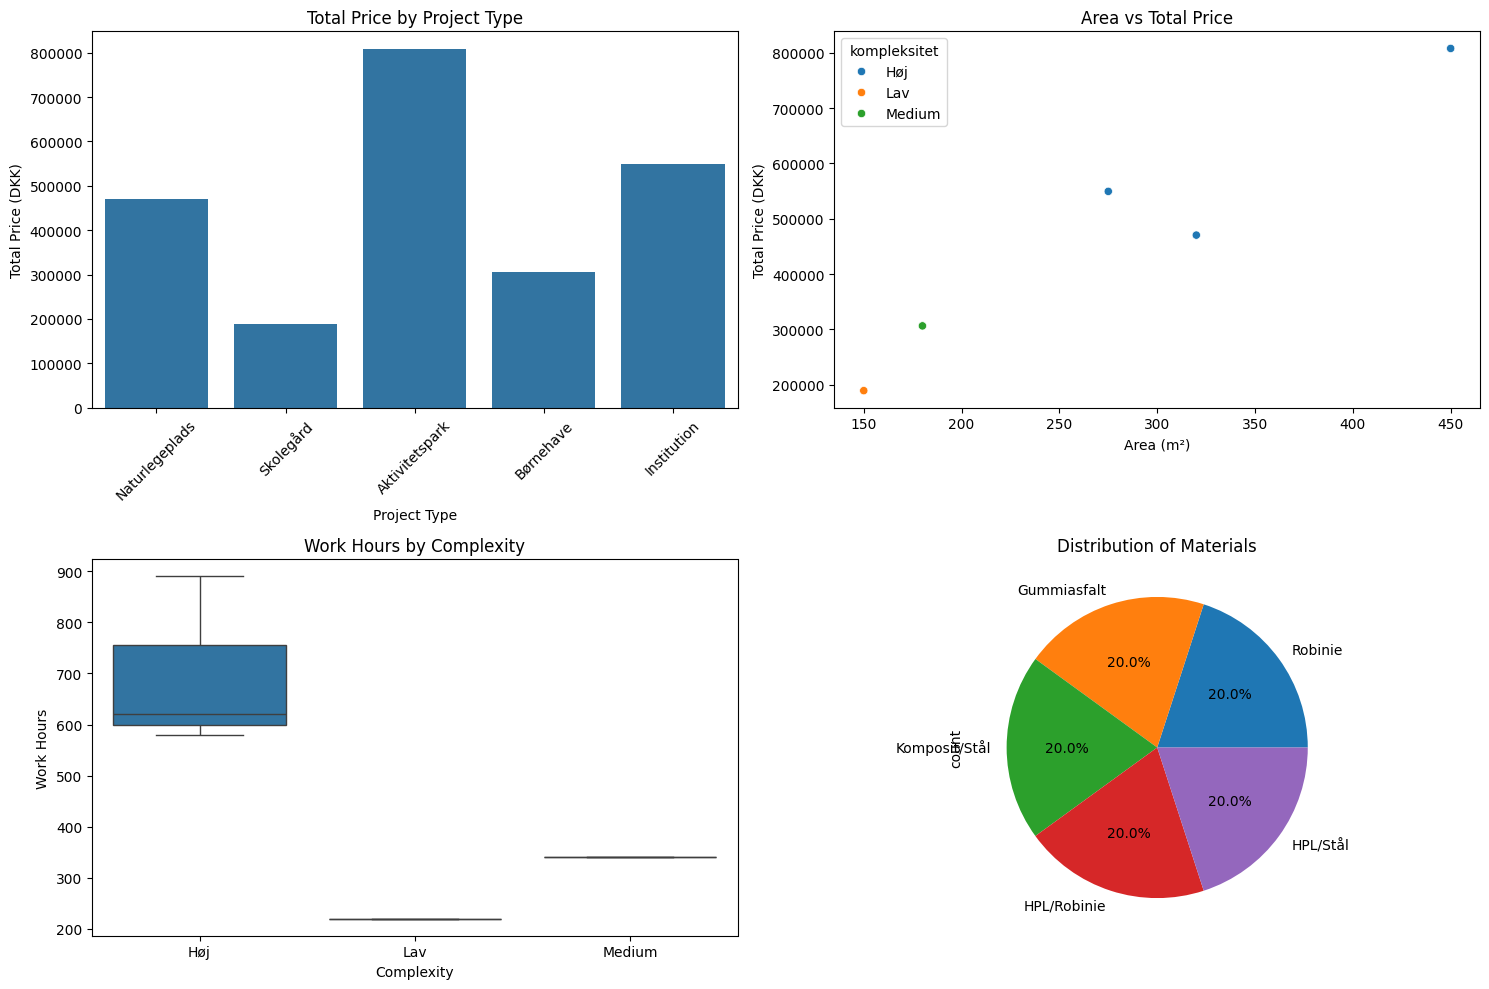

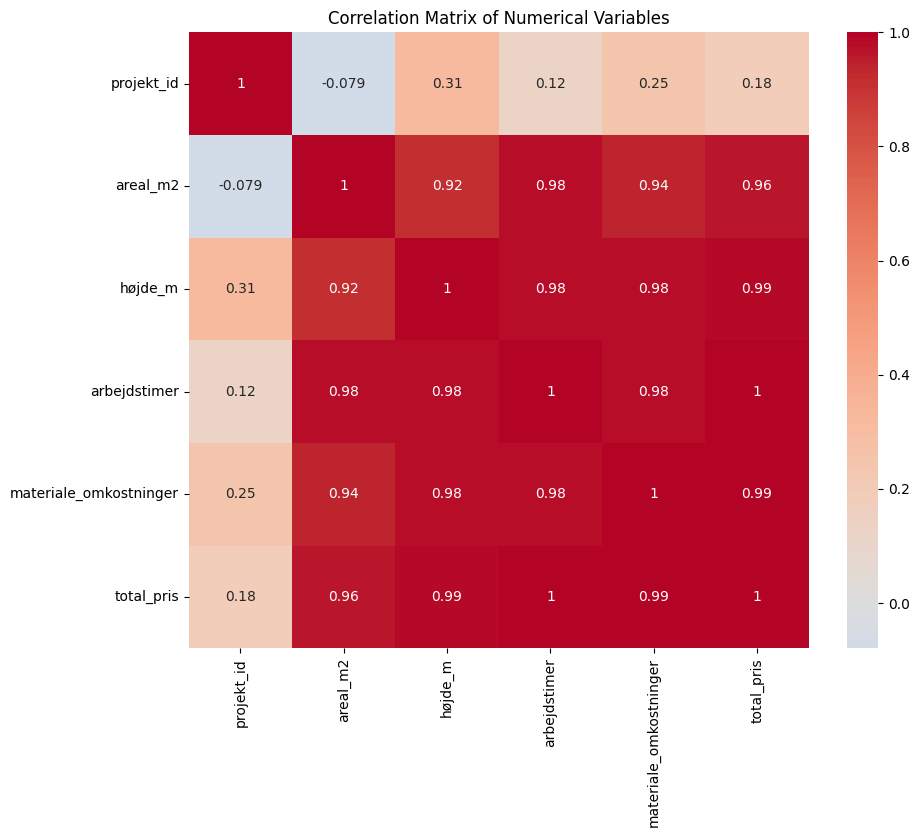


Summary by Project Type:
                total_pris  arbejdstimer  areal_m2  materiale_omkostninger
type                                                                      
Aktivitetspark    807750.0         890.0     450.0                385000.0
Børnehave         306500.0         340.0     180.0                145000.0
Institution       549500.0         620.0     275.0                255000.0
Naturlegeplads    470500.0         580.0     320.0                195000.0
Skolegård         189500.0         220.0     150.0                 85000.0

Summary by Complexity:
              total_pris  arbejdstimer  areal_m2  materiale_omkostninger
kompleksitet                                                            
Høj             609250.0        696.67    348.33               278333.33
Lav             189500.0        220.00    150.00                85000.00
Medium          306500.0        340.00    180.00               145000.00


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create hardcoded data
data = {
    'projekt_id': [2001, 2002, 2003, 2004, 2005],
    'type': ['Naturlegeplads', 'Skolegård', 'Aktivitetspark', 'Børnehave', 'Institution'],
    'areal_m2': [320, 150, 450, 180, 275],
    'højde_m': [2.8, 1.5, 4.2, 2.2, 3.5],
    'materiale': ['Robinie', 'Gummiasfalt', 'Komposit/Stål', 'HPL/Robinie', 'HPL/Stål'],
    'kompleksitet': ['Høj', 'Lav', 'Høj', 'Medium', 'Høj'],
    'arbejdstimer': [580, 220, 890, 340, 620],
    'materiale_omkostninger': [195000, 85000, 385000, 145000, 255000],
    'total_pris': [470500, 189500, 807750, 306500, 549500],
    'afsluttet_dato': ['2023-03-15', '2023-05-22', '2023-07-10', '2023-09-01', '2023-11-15']
}

# Create DataFrame
df = pd.DataFrame(data)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Bar plot of project types and their total prices
plt.subplot(2, 2, 1)
sns.barplot(x='type', y='total_pris', data=df)
plt.xticks(rotation=45)
plt.title('Total Price by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Total Price (DKK)')

# 2. Scatter plot of area vs total price
plt.subplot(2, 2, 2)
sns.scatterplot(x='areal_m2', y='total_pris', data=df, hue='kompleksitet')
plt.title('Area vs Total Price')
plt.xlabel('Area (m²)')
plt.ylabel('Total Price (DKK)')

# 3. Box plot of work hours by complexity
plt.subplot(2, 2, 3)
sns.boxplot(x='kompleksitet', y='arbejdstimer', data=df)
plt.title('Work Hours by Complexity')
plt.xlabel('Complexity')
plt.ylabel('Work Hours')

# 4. Pie chart of material distribution
plt.subplot(2, 2, 4)
df['materiale'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Materials')

plt.tight_layout()
plt.show()

# Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Create summary tables
print("\nSummary by Project Type:")
type_summary = df.groupby('type').agg({
    'total_pris': 'mean',
    'arbejdstimer': 'mean',
    'areal_m2': 'mean',
    'materiale_omkostninger': 'mean'
}).round(2)
print(type_summary)

print("\nSummary by Complexity:")
complexity_summary = df.groupby('kompleksitet').agg({
    'total_pris': 'mean',
    'arbejdstimer': 'mean',
    'areal_m2': 'mean',
    'materiale_omkostninger': 'mean'
}).round(2)
print(complexity_summary)